<a href="https://colab.research.google.com/github/udayagirirahul/Loan-prediction-using-Machine-learning/blob/master/Bank_Personal_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**
Marketing Campaign for Banking Products

**Problem Statment:**
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors).

In [1]:
# Importing our libraries and data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Bank_Personal_Loan_Modelling1.csv")# Uploading our data set into a Panda Dataframe 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EXPLORATORY DATA  ANALYSIS

In [3]:
#Top 10 entries of data
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
#Bottom 10 entries of data
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [5]:
#Shape of our data
print(df.shape)

(5000, 14)


In [7]:
#Data type of each attribute
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
#Information about our data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Check for null values in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
#Statastical summary of our data
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Personal Loan count
#0 indicates people who did not accept the personal loan that was offered to them in the earlier campaign.
#1 indicates people who accepted the personal loan that was offered to them in the earlier campaign.
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [9]:
#Statastical summary of our data in a better view
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Cleaning of unnecessary data

In [8]:
# Checking the negative values
df[df['Experience'] < 0]['Experience'].sum()


-75

We can observe from our dataset experience values are negative which is not possible so one of the approach to refill them is to raplace them with one of the statistical approach.


In [ ]:
#Replacing negative value with median of positive value.
# Median is preferred because it is not sensitive on boundary values.
df[df['Experience'] < 0]=np.nan
df.fillna(df['Experience'].median())

In [20]:
(df['Experience']<0).count()

5000

In [18]:
df.describe().T#Now we can see there are no negative values in experience

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# EDA

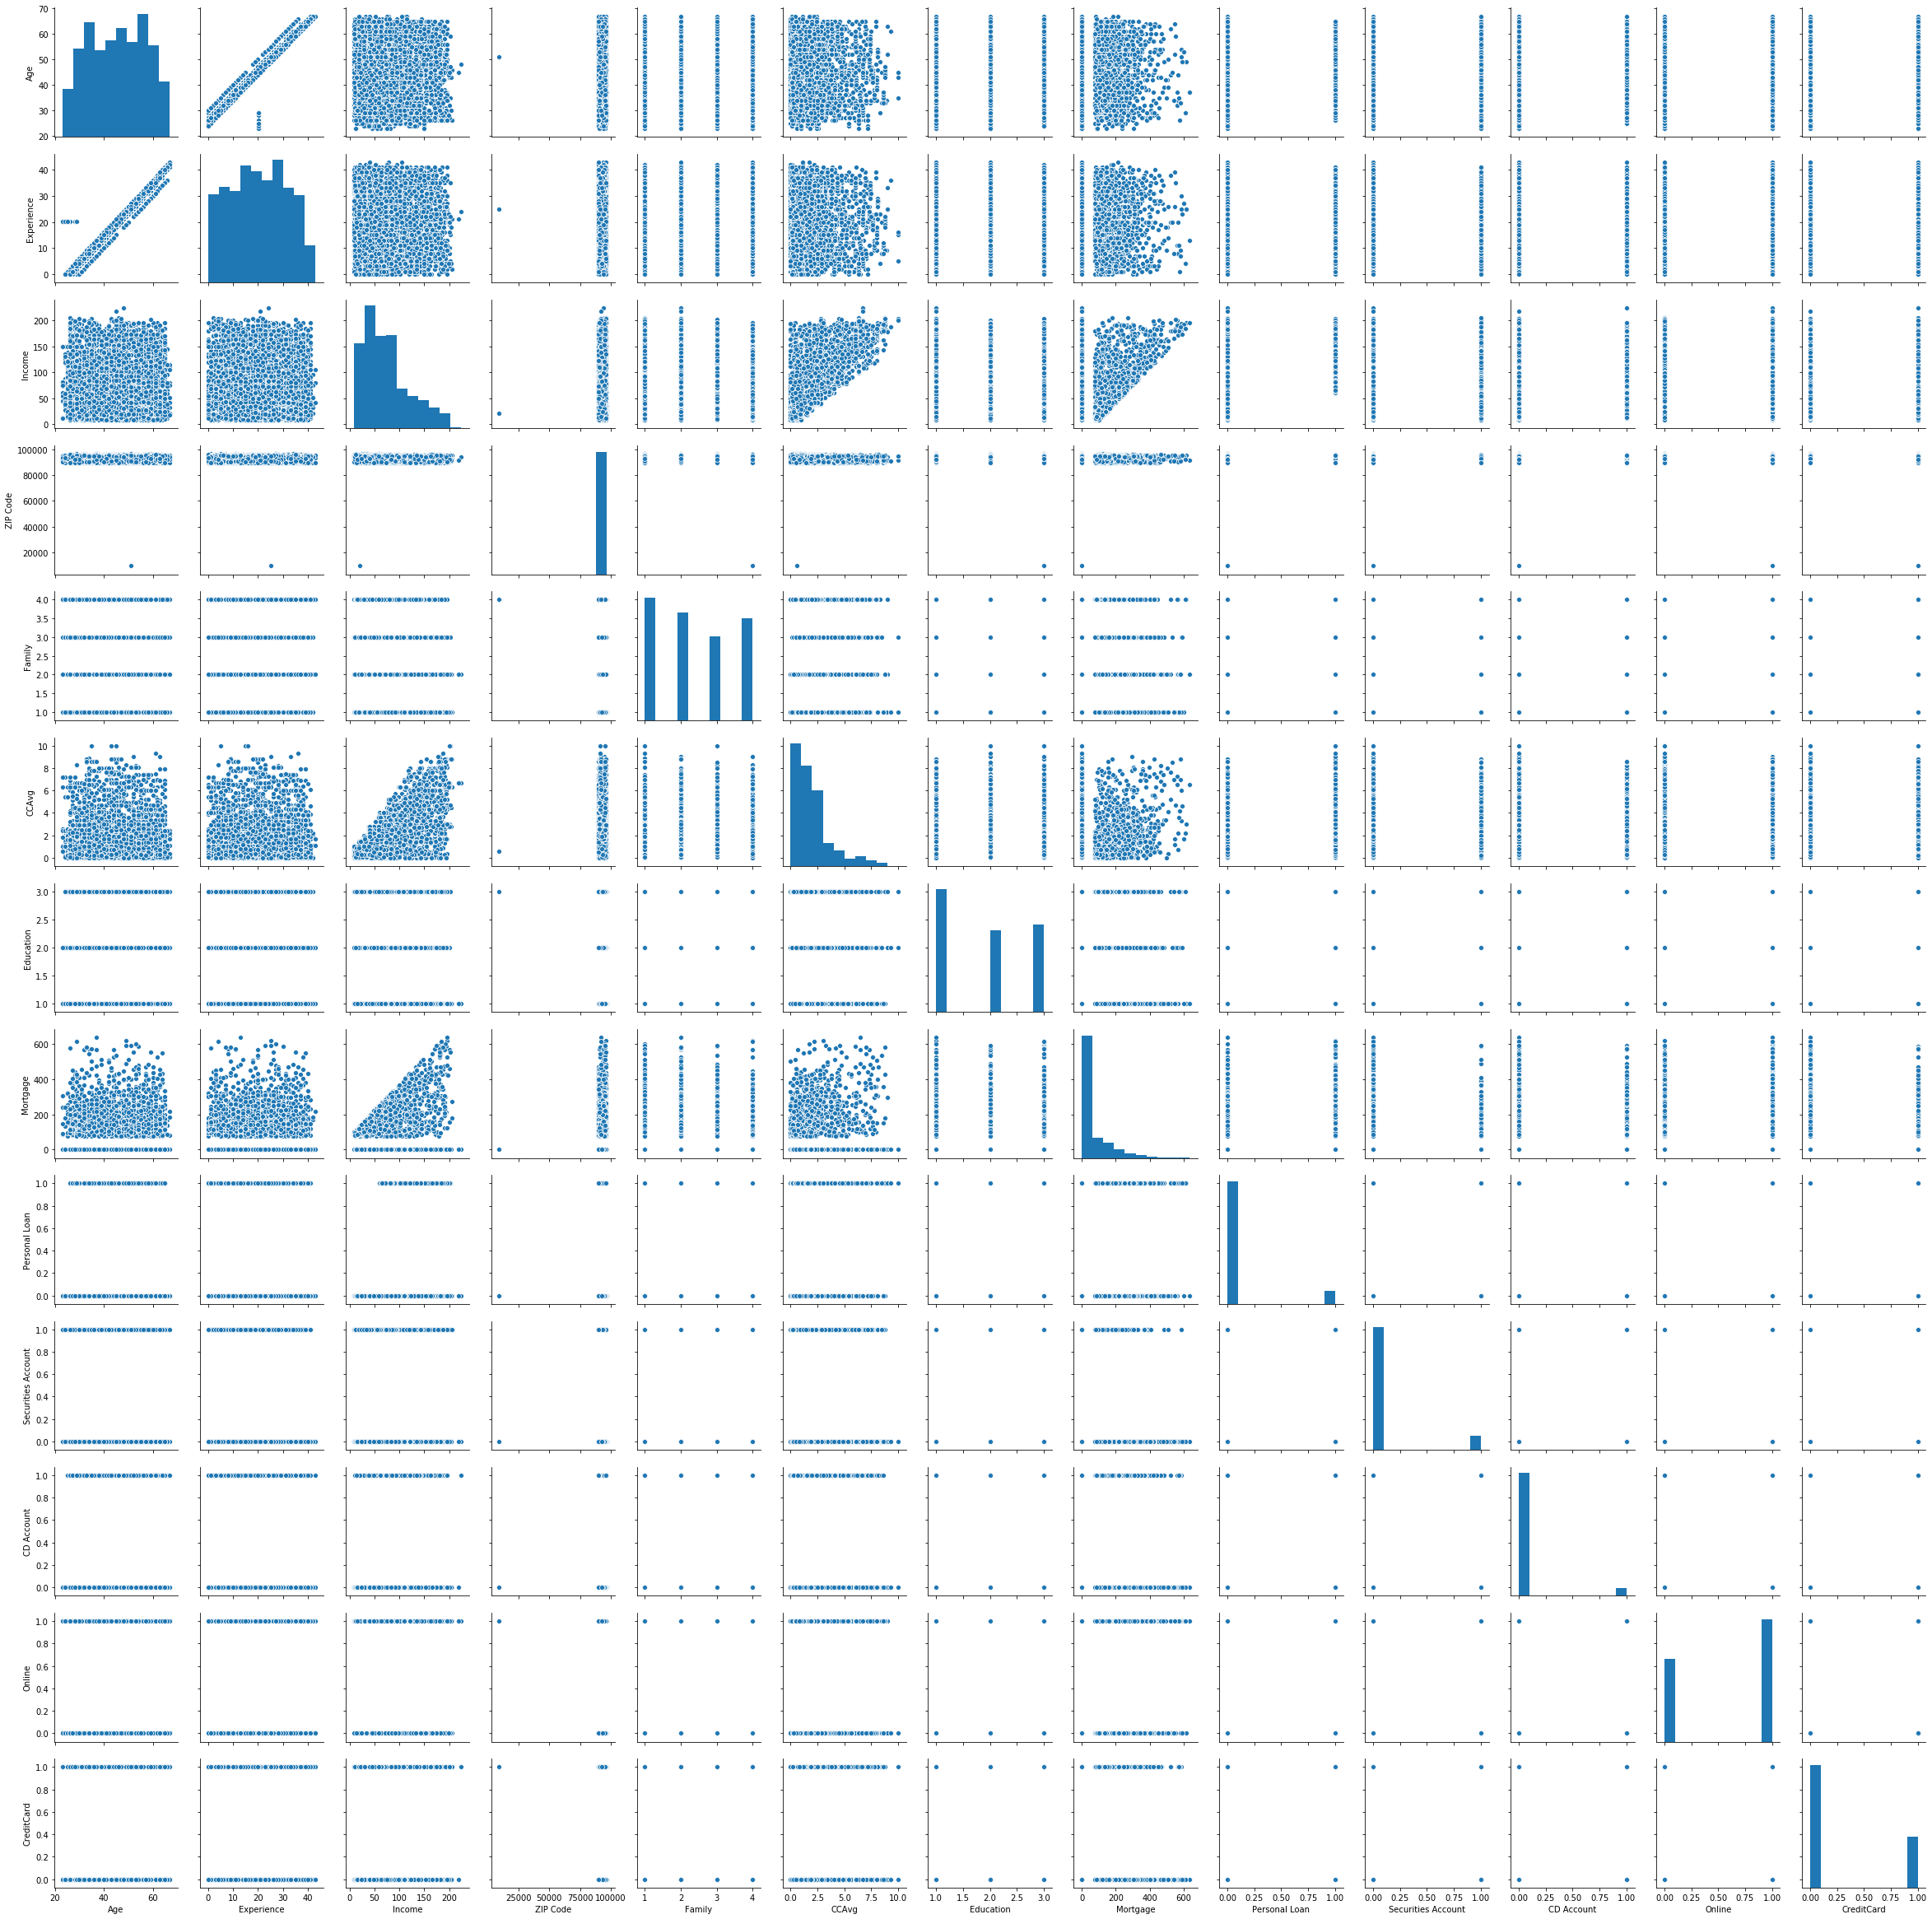

In [ ]:
#Pairplot
sns.pairplot(df.iloc[:,1:]) 

In [ ]:
#Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              45
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
#Number of people with zero mortgage
(df["Mortgage"]==0).value_counts()

True     3462
False    1538
Name: Mortgage, dtype: int64

In [ ]:
#Number of people with zero credit card spending per month
(df["CreditCard"]==0).value_counts()

True     3530
False    1470
Name: CreditCard, dtype: int64

In [ ]:
#Value counts of all categorical columns
print(df["Education"].value_counts()) #1-UnderGraduate   2-Graduate  3-Advanced/Professional
print(df["Personal Loan"].value_counts())   # 1-Yes  0-No
print(df["Securities Account"].value_counts())
print(df["CD Account"].value_counts())
print(df["Online"].value_counts())
print(df["CreditCard"].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


# Data Visualization

### Univariate and Bivariate analysis

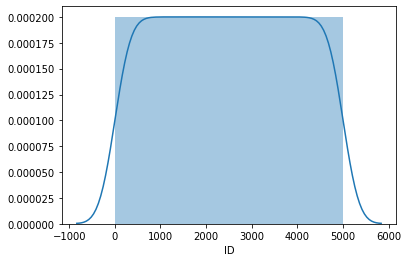

In [ ]:
sns.distplot(df['ID'])

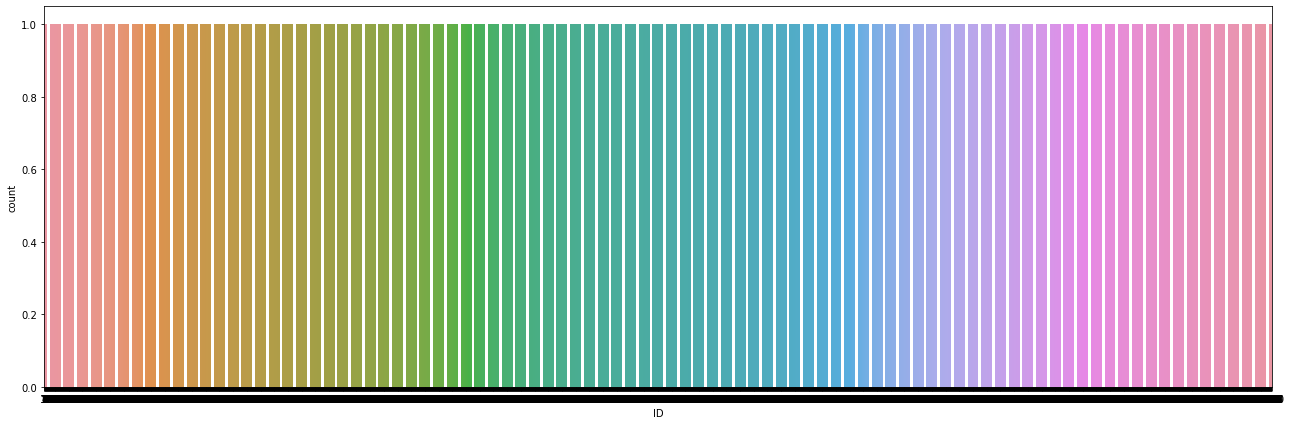

In [ ]:
plt.figure(figsize=(22,7))
sns.countplot(df['ID'])

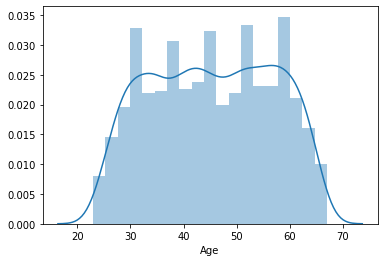

In [ ]:
sns.distplot(df['Age'])

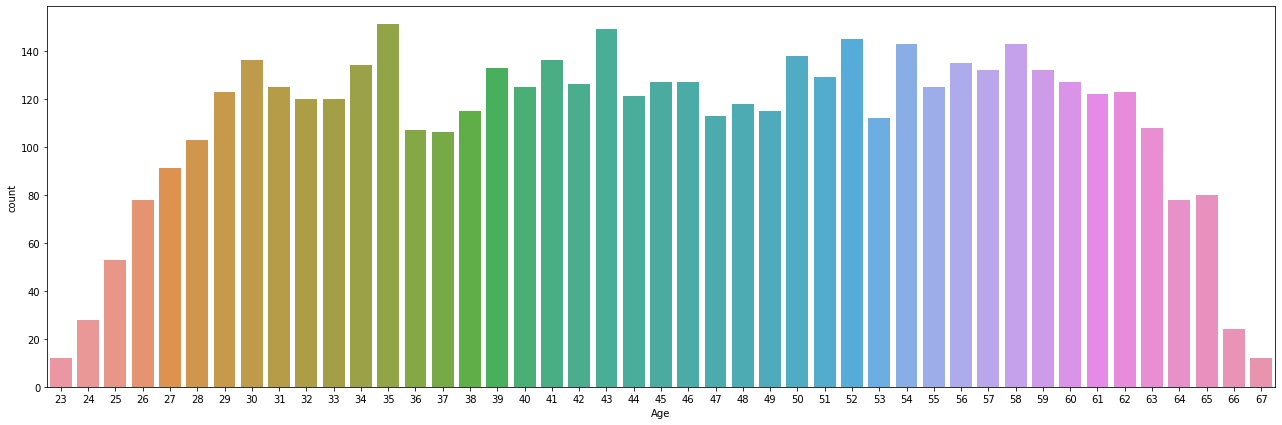

In [ ]:
plt.figure(figsize=(22,7))
sns.countplot(df['Age'])

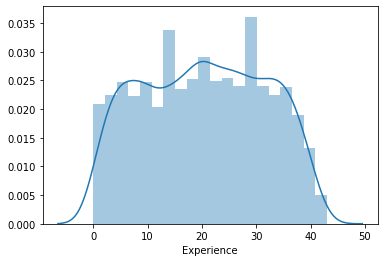

In [ ]:
sns.distplot(df['Experience'])

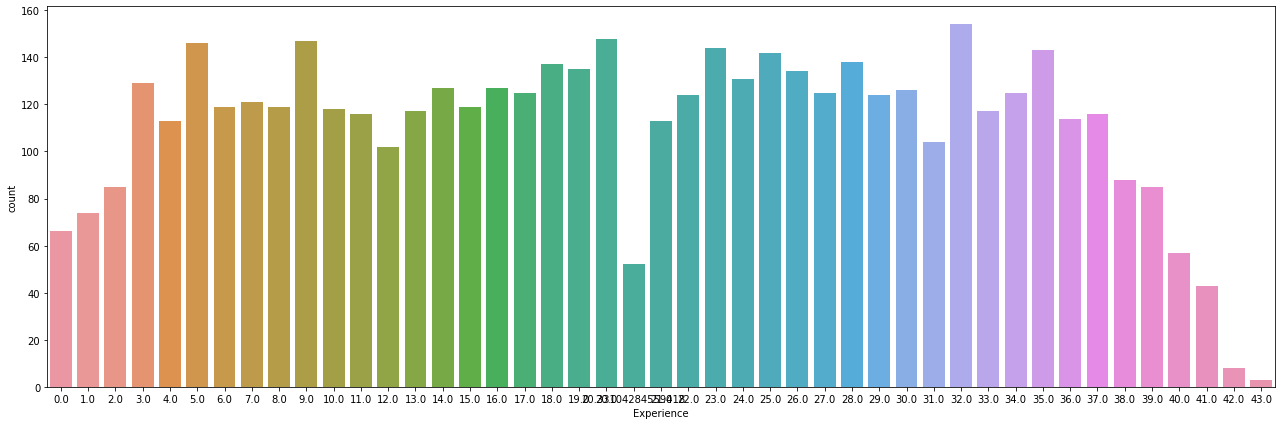

In [ ]:
plt.figure(figsize=(22,7))
sns.countplot(df['Experience'])

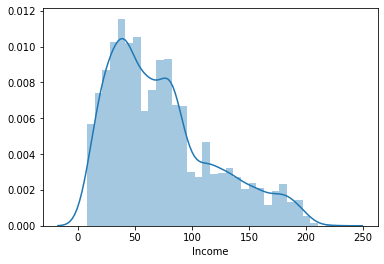

In [ ]:
sns.distplot(df['Income'])

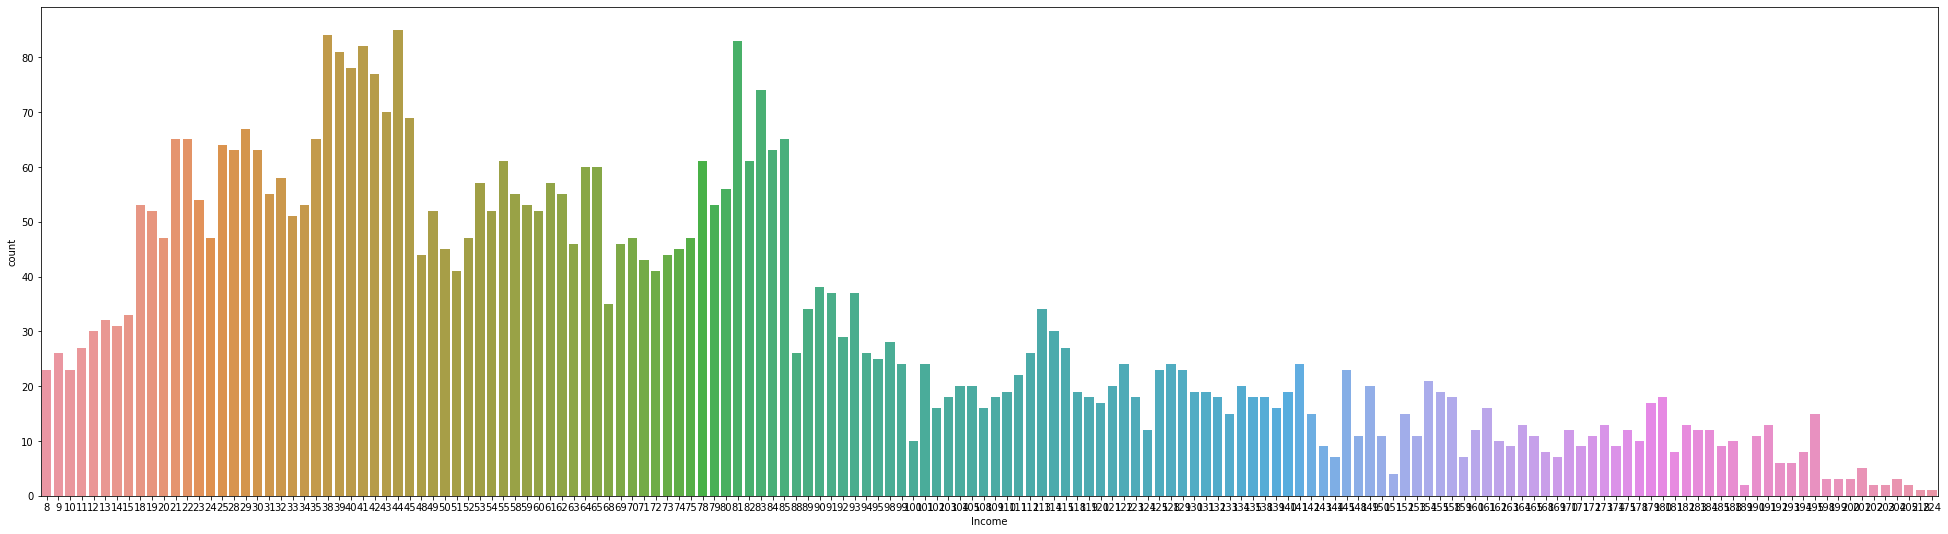

In [ ]:
plt.figure(figsize=(34,9))
sns.countplot(df['Income'])

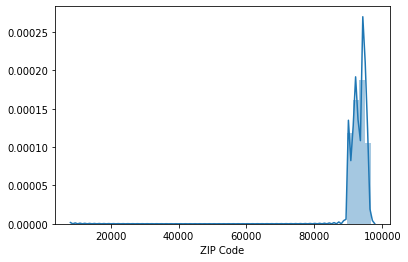

In [ ]:
sns.distplot(df['ZIP Code'])

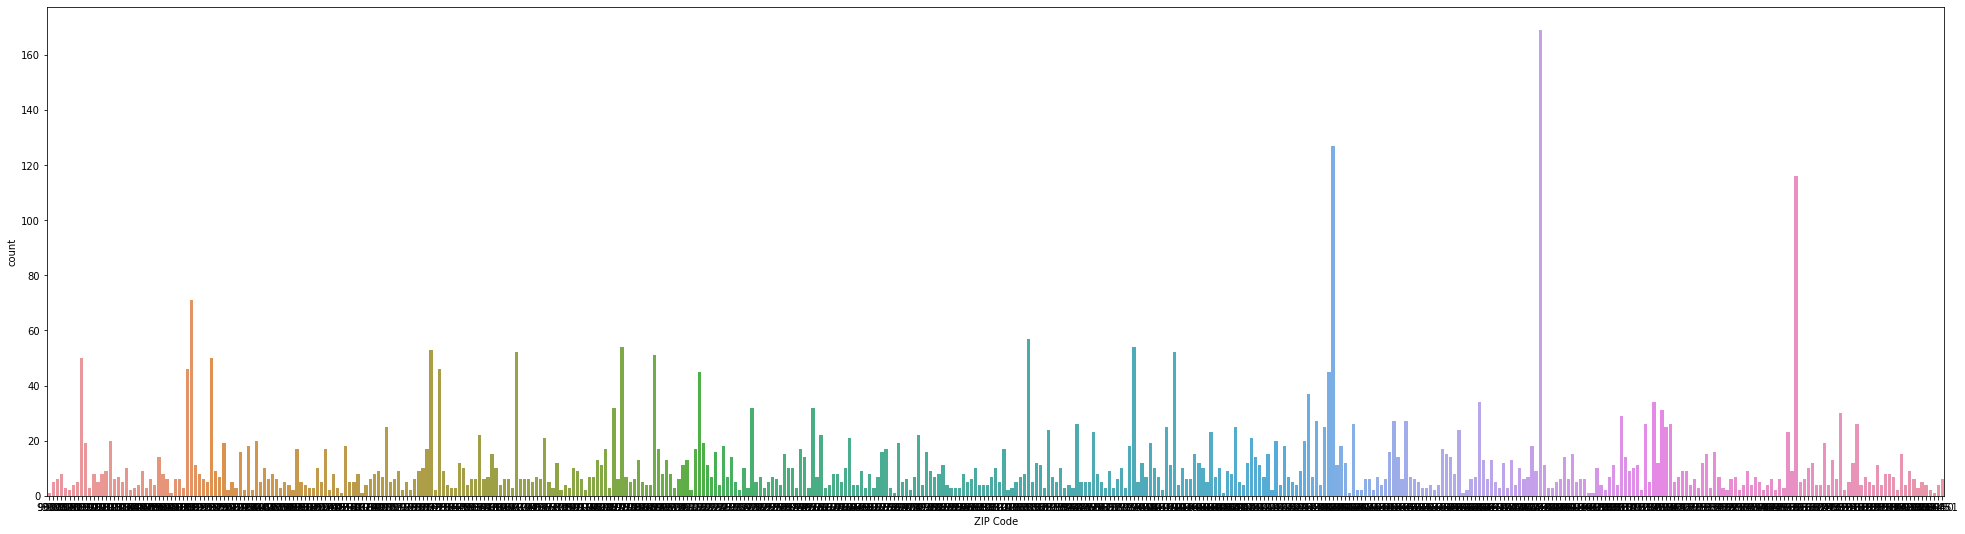

In [ ]:
plt.figure(figsize=(34,9))
sns.countplot(df['ZIP Code'])

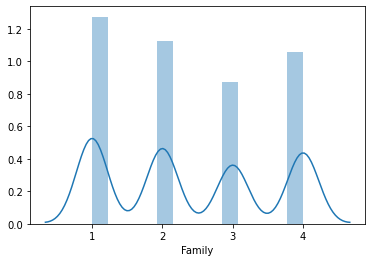

In [ ]:
sns.distplot(df['Family'])

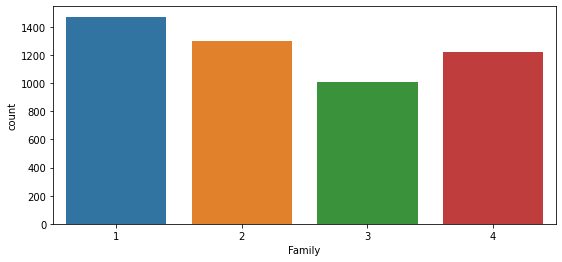

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(df['Family'])

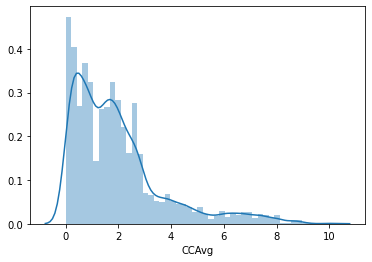

In [24]:
sns.distplot(df['CCAvg'])

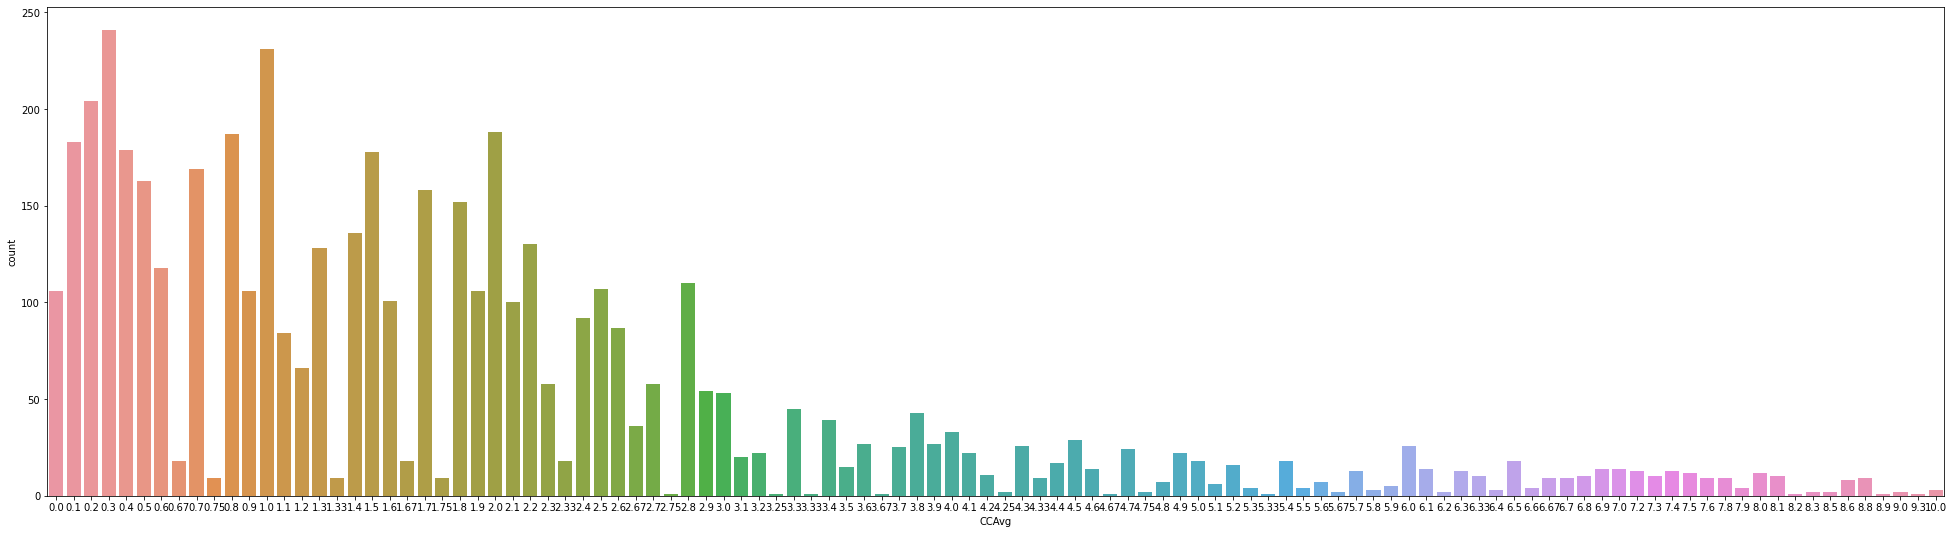

In [25]:
plt.figure(figsize=(34,9))
sns.countplot(df['CCAvg'])

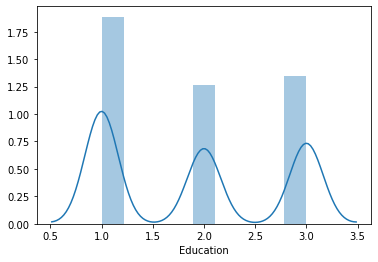

In [26]:
sns.distplot(df['Education'])

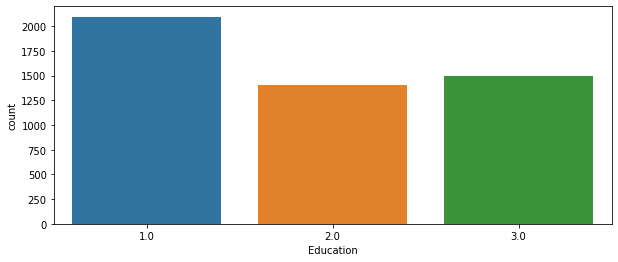

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(df['Education'])

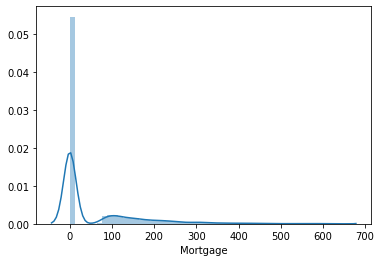

In [ ]:
sns.distplot(df['Mortgage'])

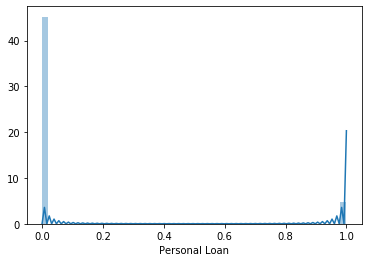

In [ ]:
sns.distplot(df['Personal Loan'])

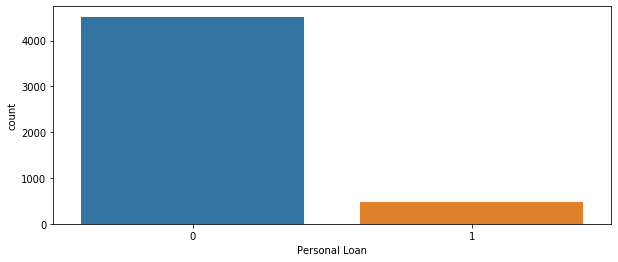

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(df['Personal Loan'])

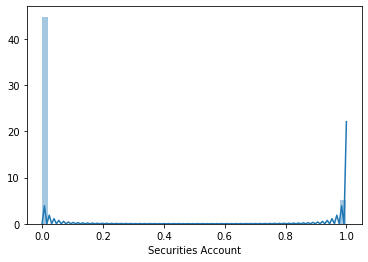

In [ ]:
sns.distplot(df['Securities Account'])

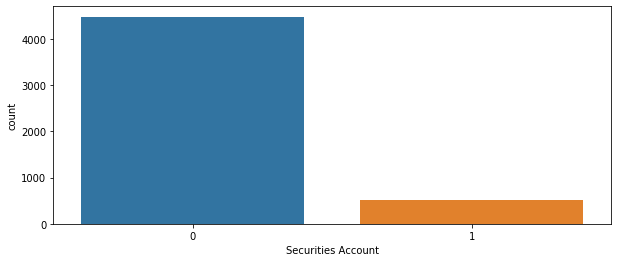

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(df['Securities Account'])

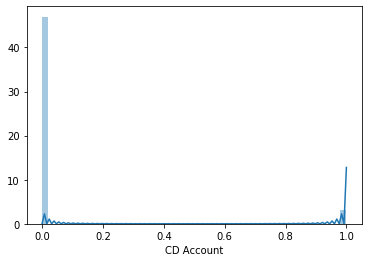

In [ ]:
sns.distplot(df['CD Account'])

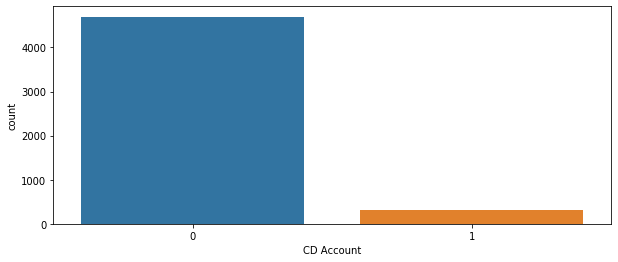

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(df['CD Account'])

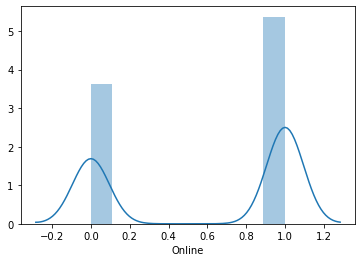

In [ ]:
sns.distplot(df['Online'])

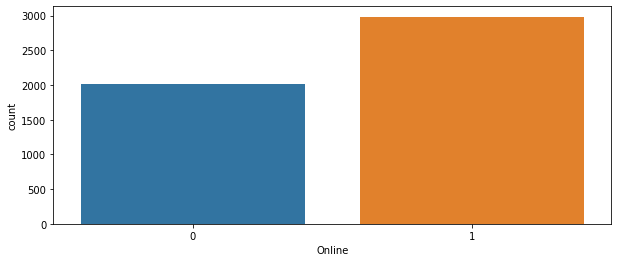

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(df['Online'])

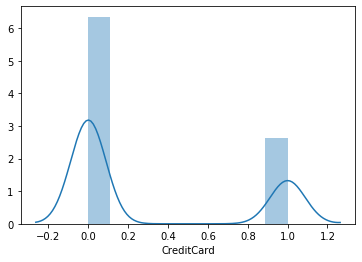

In [ ]:
sns.distplot(df['CreditCard'])

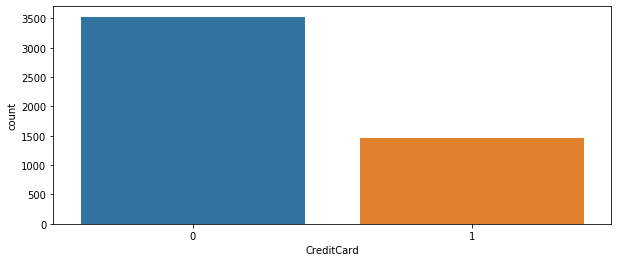

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(df['CreditCard'])

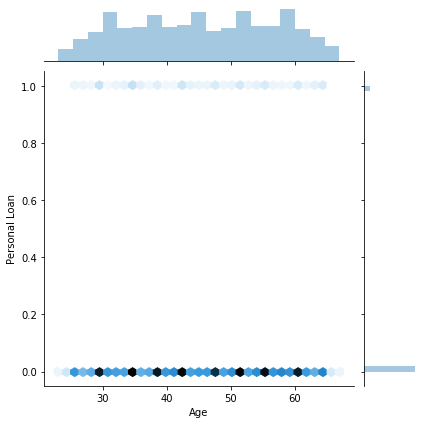

In [ ]:
sns.jointplot('Age','Personal Loan',data=df,kind='hex')

In [ ]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

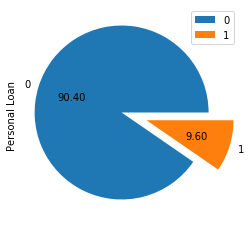

In [ ]:
#Personal Loan Precentage
df["Personal Loan"].value_counts().plot(kind='pie',autopct='%2.2f',explode = (0.1,0.2))
plt.legend()

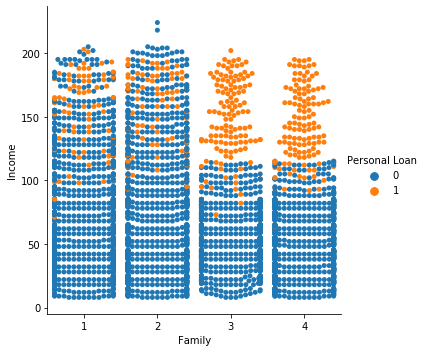

In [ ]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

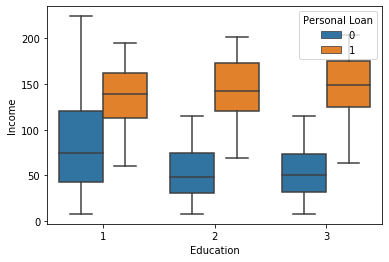

In [ ]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

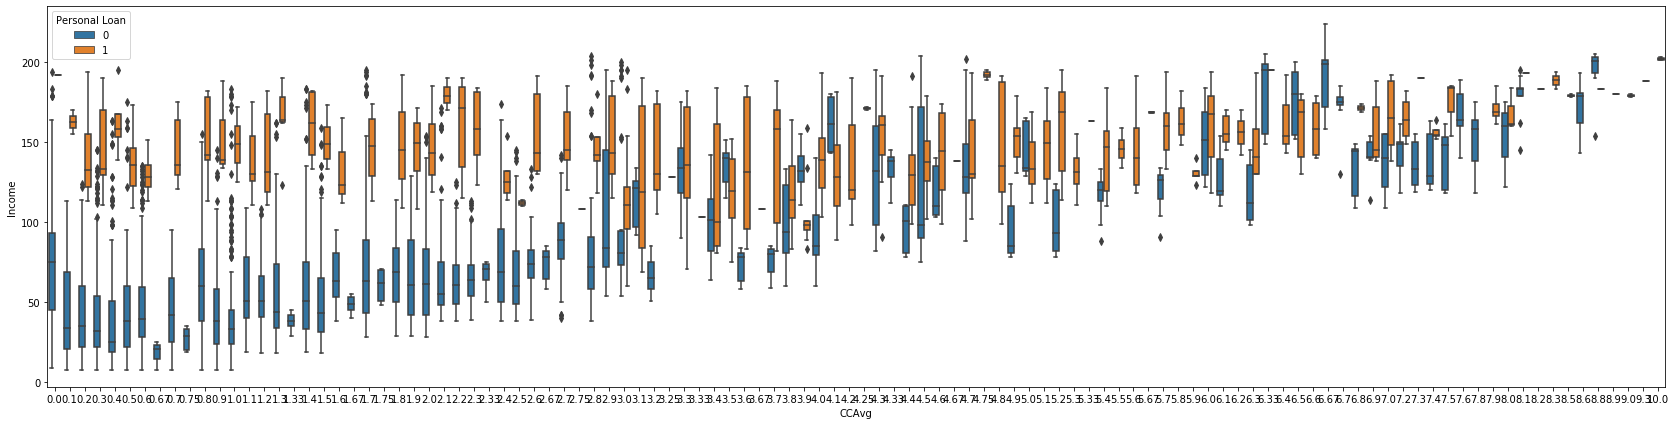

In [ ]:
plt.figure(figsize=(29,7))
sns.boxplot(x='CCAvg', y='Income', hue='Personal Loan', data = df)

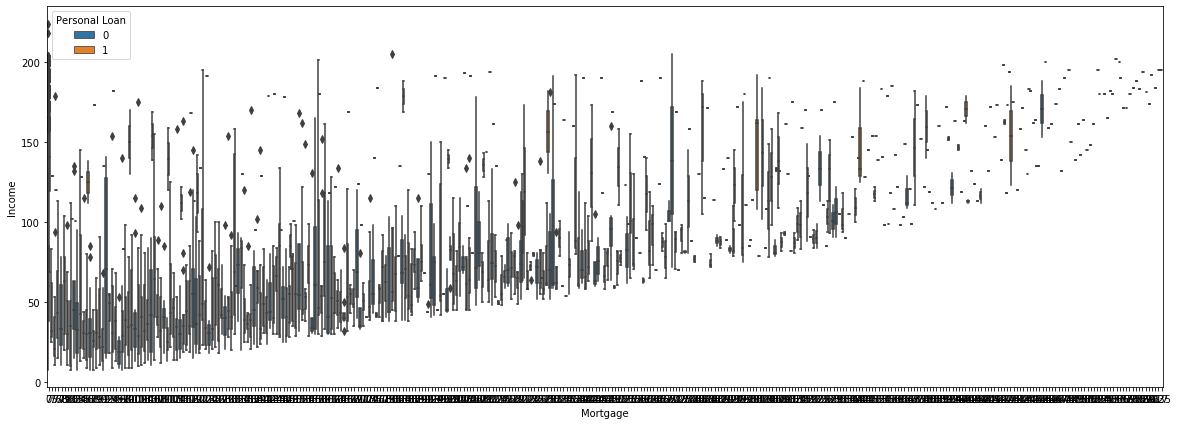

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Mortgage', y='Income', hue='Personal Loan', data = df)

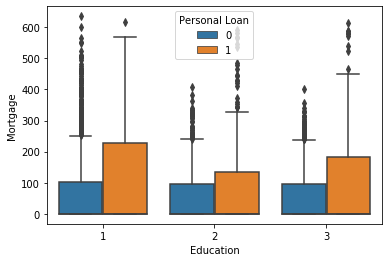

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

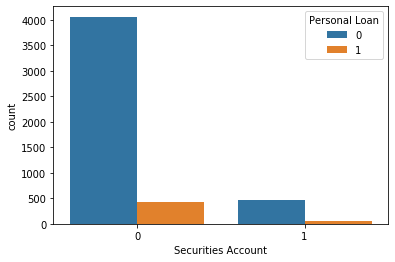

In [ ]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

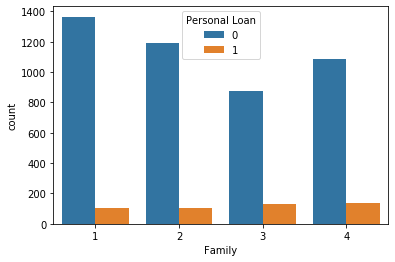

In [ ]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

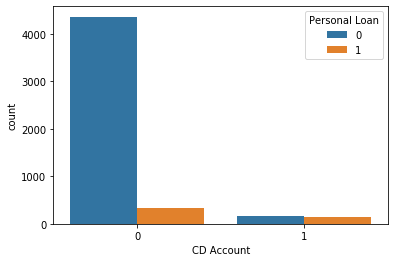

In [ ]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

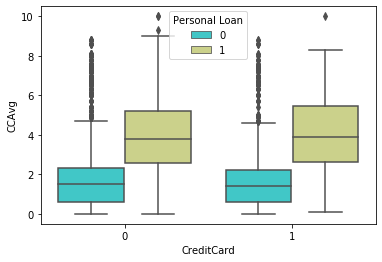

In [ ]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df,palette='rainbow')

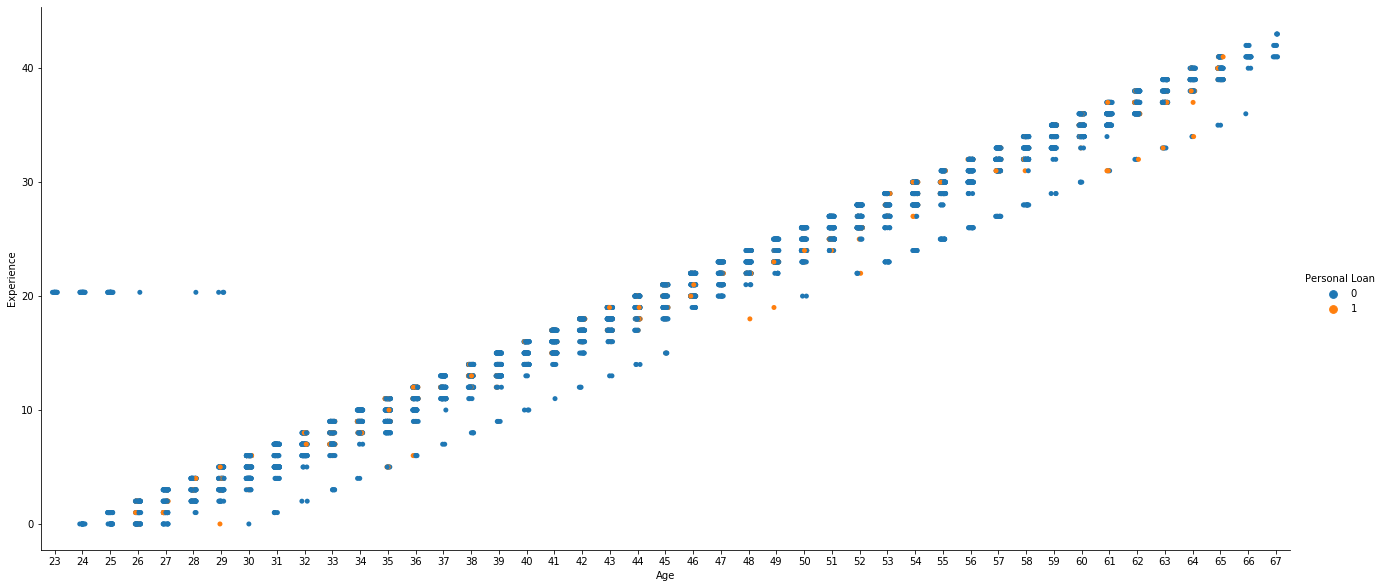

In [ ]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

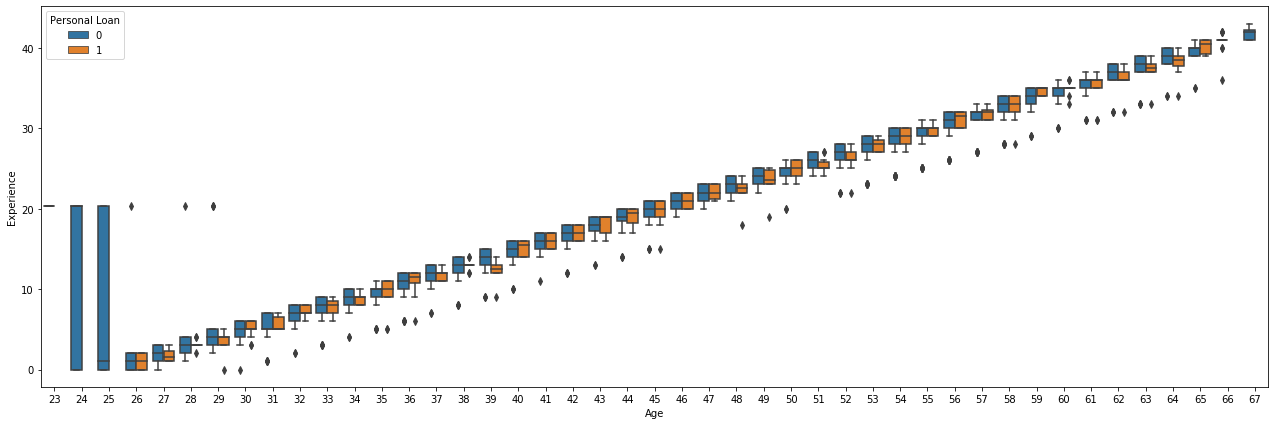

In [ ]:
plt.figure(figsize=(22,7))
sns.boxplot(x="Age", y='Experience', hue="Personal Loan", data=df)

In [ ]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009355,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.976630,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009355,0.976630,1.000000,-0.049072,-0.028479,-0.045403,-0.048685,0.018145,-0.013404,-0.014113,-0.000454,0.005449,0.013447,0.008830
Income,-0.017695,-0.055269,-0.049072,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028479,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045403,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048685,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018145,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013404,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014113,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


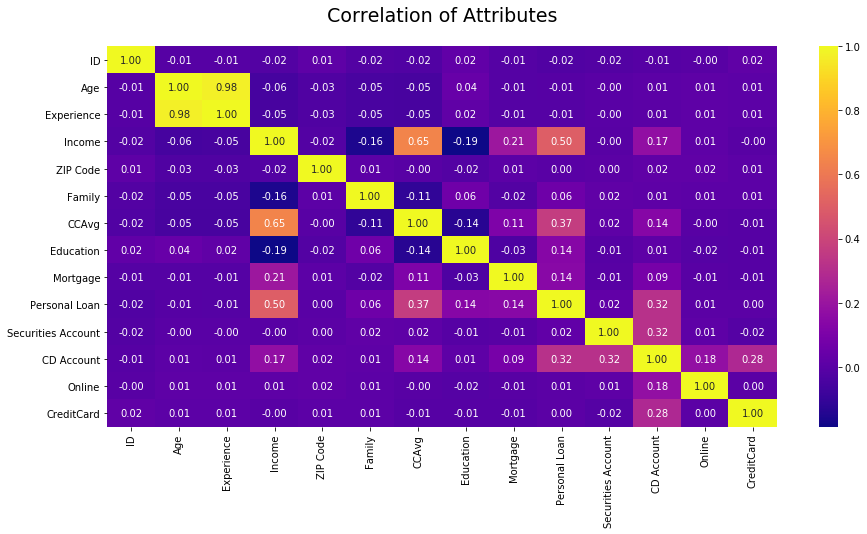

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(),cmap='plasma', annot=True, fmt='.2f')

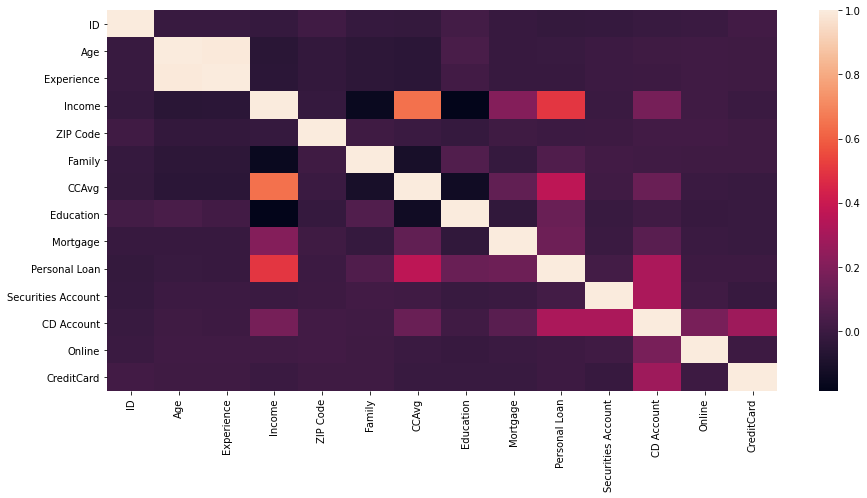

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr())

In [ ]:
#The principal diagonal elements have correlation value 1 because a parameter is always correlated to itself
#We can observe Age and Experience are highly correlated and the correlation is almost 1.
#'Income' and 'CCAvg' are moderately correlated.
#Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
#We can see in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
#'Mortgage' has moderate correlation with 'Income' which is about 12%.
#'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.
#With this we came to a conclusion on which data is required for likelihood of a liability customer buying personal loans.

# Model building

In [28]:
df = df.drop(['ID','ZIP Code'], axis=1)
#Remove ID and ZIP Code from our data since they are least required to whwther to give loan or not to a customer. 

In [29]:
df.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,45.0,19.0,34.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,39.0,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
5,37.0,13.0,29.0,4.0,0.4,2.0,155.0,0.0,0.0,0.0,1.0,0.0
6,53.0,27.0,72.0,2.0,1.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0
7,50.0,24.0,22.0,1.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,1.0
8,35.0,10.0,81.0,3.0,0.6,2.0,104.0,0.0,0.0,0.0,1.0,0.0
9,34.0,9.0,180.0,1.0,8.9,3.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
X_num=df.iloc[:,[0,1,2,4,6]].values#Highly corelated values to personal loan
xn=pd.DataFrame(data=X_num)

In [53]:
X_num

array([[25. ,  1. , 49. ,  1.6,  0. ],
       [45. , 19. , 34. ,  1.5,  0. ],
       [39. , 15. , 11. ,  1. ,  0. ],
       ...,
       [63. , 39. , 24. ,  0.3,  0. ],
       [65. , 40. , 49. ,  0.5,  0. ],
       [28. ,  4. , 83. ,  0.8,  0. ]])

In [55]:
y_cat=df.iloc[:,[3,5,7,9,10,11]].values#Least corelated values to personal loan
yn=pd.DataFrame(data=y_cat)

In [56]:
y_cat

array([[4., 1., 0., 0., 0., 0.],
       [3., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       ...,
       [2., 3., 0., 0., 0., 0.],
       [3., 2., 0., 0., 1., 0.],
       [3., 1., 0., 0., 1., 1.]])

In [57]:
X_num.shape

(5000, 5)

In [58]:
y_cat.shape

(5000, 6)

In [49]:
from sklearn import preprocessing
#preprocessing module is used to scale our data into a finite range

In [ ]:
x = df[['Age']].values.astype(float)


    # Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

    # View the dataframe
print(df_normalized)

             0
0     0.045455
1     0.500000
2     0.363636
3     0.272727
4     0.272727
...        ...
4995  0.136364
4996  0.159091
4997  0.909091
4998  0.954545
4999  0.113636

[5000 rows x 1 columns]


In [ ]:
y = df[['Experience']].values.astype(float)


    # Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
y_scaled = min_max_scaler.fit_transform(y)

    # Run the normalizer on the dataframe
fd_normalizedd = pd.DataFrame(y_scaled)

    # View the dataframe
print(fd_normalizedd)

             0
0     0.023256
1     0.441860
2     0.348837
3     0.209302
4     0.186047
...        ...
4995  0.069767
4996  0.093023
4997  0.906977
4998  0.930233
4999  0.093023

[5000 rows x 1 columns]


In [ ]:
z=  df[['Income']].values.astype(float)


    # Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
z_scaled = min_max_scaler.fit_transform(z)

    # Run the normalizer on the dataframe
dg_normalizedd = pd.DataFrame(z_scaled)

    # View the dataframe
print(dg_normalizedd)

             0
0     0.189815
1     0.120370
2     0.013889
3     0.425926
4     0.171296
...        ...
4995  0.148148
4996  0.032407
4997  0.074074
4998  0.189815
4999  0.347222

[5000 rows x 1 columns]


In [ ]:
a = df[['CCAvg']].values.astype(float)


    # Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)

    # Run the normalizer on the dataframe
gd_normalizedd = pd.DataFrame(a_scaled)

    # View the dataframe
print(gd_normalizedd)

         0
0     0.16
1     0.15
2     0.10
3     0.27
4     0.10
...    ...
4995  0.19
4996  0.04
4997  0.03
4998  0.05
4999  0.08

[5000 rows x 1 columns]


In [ ]:
b = df[['Mortgage']].values.astype(float)


    # Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
b_scaled = min_max_scaler.fit_transform(b)

    # Run the normalizer on the dataframe
dff_normalizedd = pd.DataFrame(b_scaled)

    # View the dataframe
print(dff_normalizedd)

             0
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
4995  0.000000
4996  0.133858
4997  0.000000
4998  0.000000
4999  0.000000

[5000 rows x 1 columns]


In [ ]:
d=df_normalized
e=fd_normalizedd
l=dg_normalizedd
k=gd_normalizedd

In [ ]:
f=dff_normalizedd

In [ ]:
df1=pd.merge(d, e, left_index=True, right_index=True, how='outer')

In [ ]:
df1

,0_x,0_y
0,0.045455,0.023256
1,0.500000,0.441860
2,0.363636,0.348837
3,0.272727,0.209302
4,0.272727,0.186047
...,...,...
4995,0.136364,0.069767
4996,0.159091,0.093023
4997,0.909091,0.906977
4998,0.954545,0.930233


In [ ]:
df2=pd.merge(l,k, left_index=True, right_index=True, how='outer')

In [ ]:
df2

,0_x,0_y
0,0.189815,0.16
1,0.120370,0.15
2,0.013889,0.10
3,0.425926,0.27
4,0.171296,0.10
...,...,...
4995,0.148148,0.19
4996,0.032407,0.04
4997,0.074074,0.03
4998,0.189815,0.05


In [ ]:
df3=pd.merge(df1,df2, left_index=True, right_index=True, how='outer')

In [ ]:
df3

,0_x_x,0_y_x,0_x_y,0_y_y
0,0.045455,0.023256,0.189815,0.16
1,0.500000,0.441860,0.120370,0.15
2,0.363636,0.348837,0.013889,0.10
3,0.272727,0.209302,0.425926,0.27
4,0.272727,0.186047,0.171296,0.10
...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.19
4996,0.159091,0.093023,0.032407,0.04
4997,0.909091,0.906977,0.074074,0.03
4998,0.954545,0.930233,0.189815,0.05


In [ ]:
df4=pd.merge(df3,f, left_index=True, right_index=True, how='outer')

In [ ]:
df4

,0_x_x,0_y_x,0_x_y,0_y_y,0
0,0.045455,0.023256,0.189815,0.16,0.000000
1,0.500000,0.441860,0.120370,0.15,0.000000
2,0.363636,0.348837,0.013889,0.10,0.000000
3,0.272727,0.209302,0.425926,0.27,0.000000
4,0.272727,0.186047,0.171296,0.10,0.000000
...,...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.19,0.000000
4996,0.159091,0.093023,0.032407,0.04,0.133858
4997,0.909091,0.906977,0.074074,0.03,0.000000
4998,0.954545,0.930233,0.189815,0.05,0.000000


In [ ]:
DS=pd.merge(df4,y_cat ,left_index=True, right_index=True, how='outer')

In [ ]:
DS

,0_x_x,0_y_x,0_x_y,0_y_y,0,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,0.16,0.000000,4,1,0,1,0,0,0
1,0.500000,0.441860,0.120370,0.15,0.000000,3,1,0,1,0,0,0
2,0.363636,0.348837,0.013889,0.10,0.000000,1,1,0,0,0,0,0
3,0.272727,0.209302,0.425926,0.27,0.000000,1,2,0,0,0,0,0
4,0.272727,0.186047,0.171296,0.10,0.000000,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.19,0.000000,1,3,0,0,0,1,0
4996,0.159091,0.093023,0.032407,0.04,0.133858,4,1,0,0,0,1,0
4997,0.909091,0.906977,0.074074,0.03,0.000000,2,3,0,0,0,0,0
4998,0.954545,0.930233,0.189815,0.05,0.000000,3,2,0,0,0,1,0


In [ ]:
XX=DS.rename({'0_x_x':'Age','0_y_x':'Experience','0_x_y':'Income','0_y_y':'CCAvg','0':'Mortgage'},axis=1)

In [ ]:
XX

,Age,Experience,Income,CCAvg,0,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,0.16,0.000000,4,1,0,1,0,0,0
1,0.500000,0.441860,0.120370,0.15,0.000000,3,1,0,1,0,0,0
2,0.363636,0.348837,0.013889,0.10,0.000000,1,1,0,0,0,0,0
3,0.272727,0.209302,0.425926,0.27,0.000000,1,2,0,0,0,0,0
4,0.272727,0.186047,0.171296,0.10,0.000000,4,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.19,0.000000,1,3,0,0,0,1,0
4996,0.159091,0.093023,0.032407,0.04,0.133858,4,1,0,0,0,1,0
4997,0.909091,0.906977,0.074074,0.03,0.000000,2,3,0,0,0,0,0
4998,0.954545,0.930233,0.189815,0.05,0.000000,3,2,0,0,0,1,0


In [ ]:
XX.dtypes

Age                   float64
Experience            float64
Income                float64
CCAvg                 float64
0                     float64
Family                  int64
Education               int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
X=XX.drop('Personal Loan',axis=1)

In [ ]:
y=XX["Personal Loan"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state=101)

In [ ]:
import statsmodels.api as sm

In [ ]:
model= sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Personal Loan   R-squared (uncentered):                   0.387
Model:                            OLS   Adj. R-squared (uncentered):              0.385
Method:                 Least Squares   F-statistic:                              286.0
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                        0.00
Time:                        14:18:29   Log-Likelihood:                         -13.794
No. Observations:                5000   AIC:                                      49.59
Df Residuals:                    4989   BIC:                                      121.3
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.1019      0.062     -1.648      0.099      -0.223       0.019
Experience            -0.0060      0.062     -0.096      0.923      -0.128       0.116
Income                 0.4911      0.021     23.739      0.000       0.451       0.532
CCAvg                  0.0663      0.026      2.578      0.010       0.016       0.117
0                      0.0091      0.022      0.415      0.678      -0.034       0.052
Family                -0.0003      0.003     -0.129      0.897      -0.005       0.005
Education              0.0290      0.004      8.094      0.000       0.022       0.036
Securities Account    -0.0938      0.012     -7.896      0.000      -0.117      -0.071
CD Account             0.3968      0.016     24.287      0.000       0.365       0.429
Online                -0.0701      0.007    -10.229      0.000      -0.084      -0.057
CreditCard            -0.0774      0.008     -9.934      0.000      -0.093      -0.062
==============================================================================
Omnibus:                     1656.835   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5105.676
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       6.564   Cond. No.                         85.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

Logistic Regression Training Score: 
 95.31
Logistic Regression Test Score: 
 94.67
Accuracy: 
 0.9466666666666667
Confusion Matrix:
 [[1343   11]
 [  69   77]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.88      0.53      0.66       146

    accuracy                           0.95      1500
   macro avg       0.91      0.76      0.81      1500
weighted avg       0.94      0.95      0.94      1500



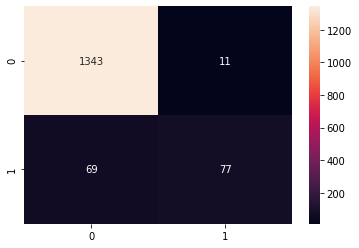

In [ ]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [ ]:
logestic_confusion_matrix = confusion_matrix(y_test, log_predicted)

In [ ]:
coeff_df = pd.DataFrame(X.columns)            #0-Mortgage
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Income,8.520182
8,CD Account,3.326337
3,CCAvg,1.656606
6,Education,1.349130
4,0,0.597817
5,Family,0.547402
0,Age,0.498946
1,Experience,-0.192945
9,Online,-0.581363
7,Securities Account,-0.797233


KNeighborsClassifier score:
 95.97
KNeighborsClassifier test score:
 94.33
Accuracy:
 0.9433333333333334
confusion Matrix:
 [[1342   12]
 [  73   73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.86      0.50      0.63       146

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



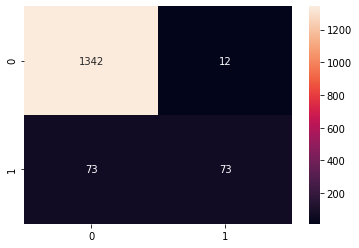

In [ ]:
# KNeighbors Classifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
#Predict output
mod_predicted=model.predict(X_test)
model_score=round(model.score(X_train,y_train)*100,2)
model_score_test=round(model.score(X_test,y_test)*100,2)
print('KNeighborsClassifier score:\n',model_score)
print('KNeighborsClassifier test score:\n',model_score_test)
print('Accuracy:\n',accuracy_score(y_test,mod_predicted))
print('confusion Matrix:\n',confusion_matrix(y_test,mod_predicted))
print('Classification Report:\n',classification_report(y_test,mod_predicted))
sns.heatmap(confusion_matrix(y_test,mod_predicted),annot=True,fmt="d")


DecisionTreeClassifier score:
 100.0
DecisionTreeClassifier Test score:
 97.67
Accuracy:
 0.9766666666666667
Confusion Matrix:
 [[1336   18]
 [  17  129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.88      0.88      0.88       146

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.93      1500
weighted avg       0.98      0.98      0.98      1500



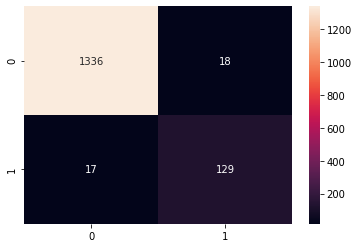

In [ ]:
# Decision Tree Classifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
#Predict output
y_predicted=clf.predict(X_test)
clf_score=round(clf.score(X_train,y_train)*100,2)
clf_score_test=round(clf.score(X_test,y_test)*100,2)
print('DecisionTreeClassifier score:\n',clf_score)
print('DecisionTreeClassifier Test score:\n',clf_score_test)
print('Accuracy:\n',accuracy_score(y_test,y_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predicted))
print('Classification Report:\n',classification_report(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt="d")

In [ ]:
###Model evaluation
models = pd.DataFrame({
    'Model':['Logistic Regression','KNeighborsClassifier','Decision Tree Classifier'],
    'Score':[logreg_score,model_score,clf_score],
    'Test Score':[logreg_score_test,model_score_test,clf_score_test]})
models.sort_values(by='Test Score',ascending=False)

,Model,Score,Test Score
2,Decision Tree Classifier,100.00,97.67
0,Logistic Regression,95.31,94.67
1,KNeighborsClassifier,95.97,94.33


**summary of the model**
  This model helps to predict the likelihood of a customer buying
personal loans.
  The model will help the department identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign. This Machine learning model helps the banks to sort the people and give higher profit results.